# Purpose

This notebook is a working exploration of classification algorithms.

# MNIST Dataset

MNIST dataset is a set of 70,000 small images of digits handwritten by highschool students.  It is a commonly studied dataset for classification problems.  I'll access it via `sklearn`.   

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Separating out the features and target variable.

In [19]:
X, y = mnist["data"], mnist["target"]
#forcing to numpy array
X = X.to_numpy()
y = y.to_numpy()

print("X shape: {}, y shape: {}".format(X.shape, y.shape))

X shape: (70000, 784), y shape: (70000,)


There are 70,000 images (rows) and each have 784 features (columns) because each image is 28 x 28 pixels and each feature simply represents each pixel's intensity froom 0 (white) to 255 (black).  I can look at an individual image using `matplotlib`'s `imshow()` function.

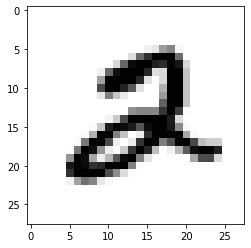

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.show()

This digit looks like a 2 to me and below I'm confirming that is in fact how it is labeled.  Notice the label is a string, so I'm also going to cast y to integer.

In [28]:
import numpy as np
print('image label: {}, label type: {}'.format(y[5], type(y[5])))

y = y.astype(np.uint8)

image label: 2, label type: <class 'str'>


Of course, before I do any EDA work I want to split out a test dataset.  In the case of the MNIST dataset, this is already separated for me.  The first 60,000 images are my training set and the final 10,000 are my test set.  The training set is already shuffled, which is good in this case but would not be in some other cases, e.g. time series, because it ensures all CV folds will contain similar digits.

# Training a Binary Classifier

